In [48]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Use a matplotlib style similar to seaborn's whitegrid
DATA_PATH = Path('../results/combined/combined_tunability.csv')
OUT_DIR = Path('../results/combined/plots')
OUT_DIR.mkdir(parents=True, exist_ok=True)
print('Data path:', DATA_PATH)

Data path: ..\results\combined\combined_tunability.csv


In [ ]:
df = pd.read_csv(DATA_PATH)

df = df[df['dataset_usage_percent'] == 100]

display(df.head())

,model,sampling_method,dataset_id,dataset_usage_percent,reference_auc,reference_risk,best_dataset_auc,best_dataset_risk,tunability_risk_diff,n_trials,source_path
0,decision_tree,bayesian,1590,100,0.875709,0.124291,0.903311,0.096689,0.027602,32,results_part2\usage_100\tunability_analysis.csv
1,decision_tree,bayesian,1510,100,0.962070,0.037930,0.975140,0.024860,0.013069,32,results_part2\usage_100\tunability_analysis.csv
2,decision_tree,bayesian,1461,100,0.709868,0.290132,0.709868,0.290132,0.000000,32,results_part2\usage_100\tunability_analysis.csv
3,decision_tree,bayesian,24,100,0.951728,0.048272,0.972151,0.027849,0.020423,32,results_part2\usage_100\tunability_analysis.csv
4,decision_tree,bayesian,40945,100,0.986812,0.013188,0.987725,0.012275,0.000914,32,results_part2\usage_100\tunability_analysis.csv


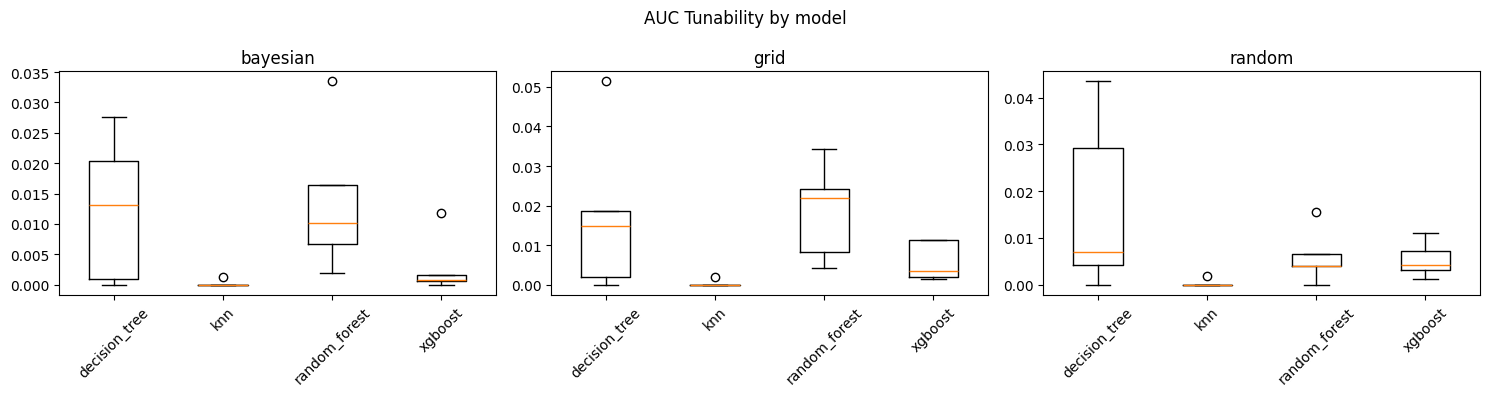

Saved ..\results\combined\plots\boxplots_per_sampling_method.png


In [ ]:
plot_path = OUT_DIR / 'boxplots_per_sampling_method.png'
methods = sorted(df['sampling_method'].dropna().unique())
cols = 3
fig, axes = plt.subplots(1, cols, figsize=(5*cols, 4), squeeze=False)
for i, m in enumerate(methods):
    c = i % cols
    ax = axes[0][c]
    part = df[df['sampling_method'] == m]
    models = sorted(part['model'].unique())
    data_to_plot = [part[part['model'] == mo]['tunability_risk_diff'].dropna().values for mo in models]
    if any(len(d) for d in data_to_plot):
        ax.boxplot(data_to_plot, labels=models)
    ax.set_title(m)
    ax.tick_params(axis='x', rotation=45)
fig.suptitle('AUC Tunability by model')
fig.subplots_adjust(top=0.9, hspace=0.4)
plt.tight_layout()
plt.show()
fig.savefig(plot_path, bbox_inches='tight')
print('Saved', plot_path)

In [51]:
# Mean tunability per dataset and model
df2 = df.groupby(['dataset_id', 'model'], as_index=False)['tunability_risk_diff'].mean()
display(df2)

,dataset_id,model,tunability_risk_diff
0,24,decision_tree,0.021910
1,24,knn,0.000000
2,24,random_forest,0.027823
3,24,xgboost,0.008758
4,1461,decision_tree,0.000000
5,1461,knn,0.000000
6,1461,random_forest,0.014874
7,1461,xgboost,0.002880
8,1510,decision_tree,0.012886
9,1510,knn,0.001642


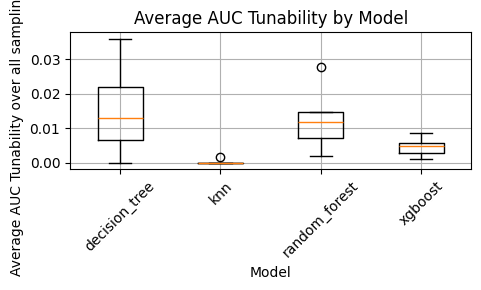

In [52]:
models = sorted(df2['model'].unique())
data_to_plot = [df2[df2['model'] == m]['tunability_risk_diff'].values for m in models]
fig, ax = plt.subplots(figsize=(5,3))
if any(len(d) for d in data_to_plot):
    ax.boxplot(data_to_plot, labels=models)
ax.set_title('Average AUC Tunability by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Average AUC Tunability over all sampling methods')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df3 = df.groupby(['model', 'sampling_method'], as_index=False)['tunability_risk_diff'].mean()
display(df3)

,model,sampling_method,tunability_risk_diff
0,decision_tree,bayesian,0.012401
1,decision_tree,grid,0.017348
2,decision_tree,random,0.016731
3,knn,bayesian,0.000242
4,knn,grid,0.000375
5,knn,random,0.000368
6,random_forest,bayesian,0.013717
7,random_forest,grid,0.018621
8,random_forest,random,0.006014
9,xgboost,bayesian,0.002953


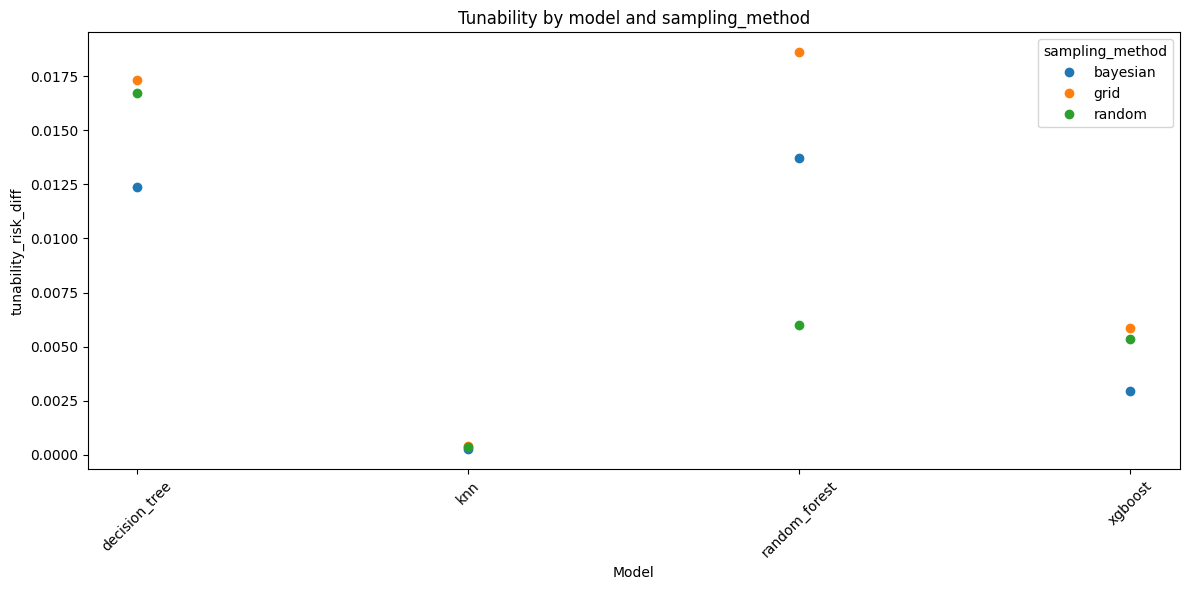

In [ ]:
models = sorted(df3['model'].unique())
methods = sorted(df3['sampling_method'].unique())
fig, ax = plt.subplots(figsize=(12,6))
for m in methods:
    sub = df3[df3['sampling_method'] == m].set_index('model').reindex(models)
    y = sub['tunability_risk_diff'].values
    ax.plot(range(len(models)), y, marker='o', label=m, linestyle='')
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('tunability_risk_diff')
ax.set_title('Tunability by model and sampling_method')
ax.legend(title='sampling_method')
plt.tight_layout()
plt.show()

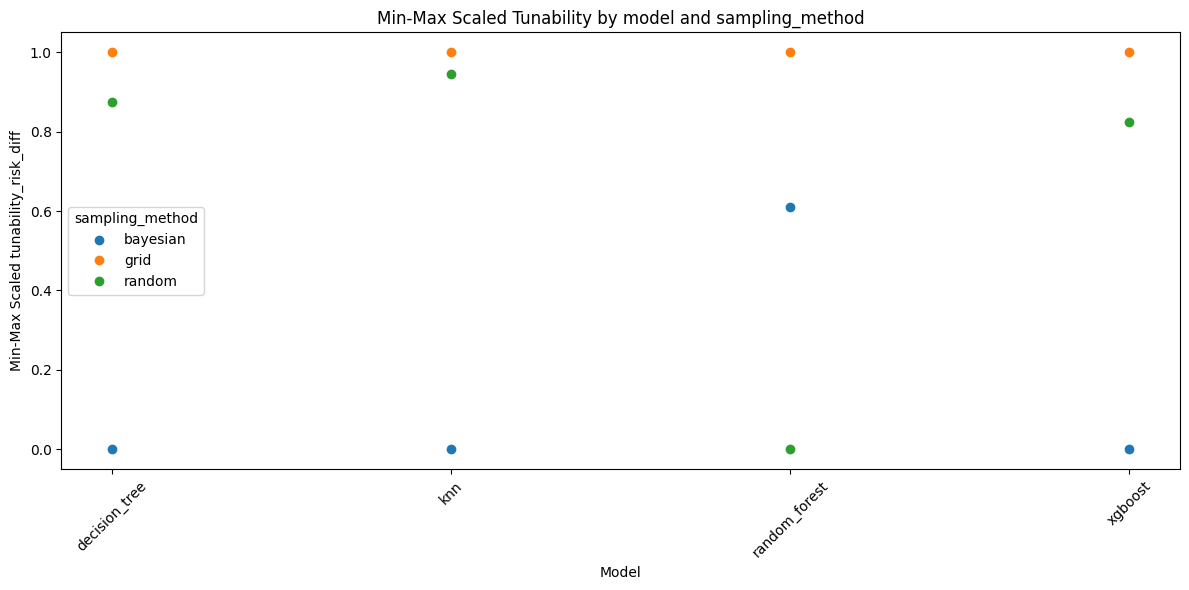

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3['tunability_minmax'] = df3.groupby('model')['tunability_risk_diff'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

models = sorted(df3['model'].unique())
methods = sorted(df3['sampling_method'].unique())
fig, ax = plt.subplots(figsize=(12,6))
for m in methods:
    sub = df3[df3['sampling_method'] == m].set_index('model').reindex(models)
    y = sub['tunability_minmax'].values
    ax.plot(range(len(models)), y, marker='o', label=m, linestyle='')
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Model')
ax.set_ylabel('Min-Max Scaled tunability_risk_diff')
ax.set_title('Min-Max Scaled Tunability by model and sampling_method')
ax.legend(title='sampling_method')
plt.tight_layout()
plt.show()

In [ ]:
avg_minmax = df3.groupby('sampling_method')['tunability_minmax'].mean().reset_index()
print('Averages of Min-Max Scaled Tunability per Sampling Method:')
print(avg_minmax)
display(avg_minmax)

Averages of Min-Max Scaled Tunability per Sampling Method:
  sampling_method  tunability_minmax
0        bayesian           0.152764
1            grid           1.000000
2          random           0.660973


,sampling_method,tunability_minmax
0,bayesian,0.152764
1,grid,1.000000
2,random,0.660973


In [58]:
df = pd.read_csv(DATA_PATH)

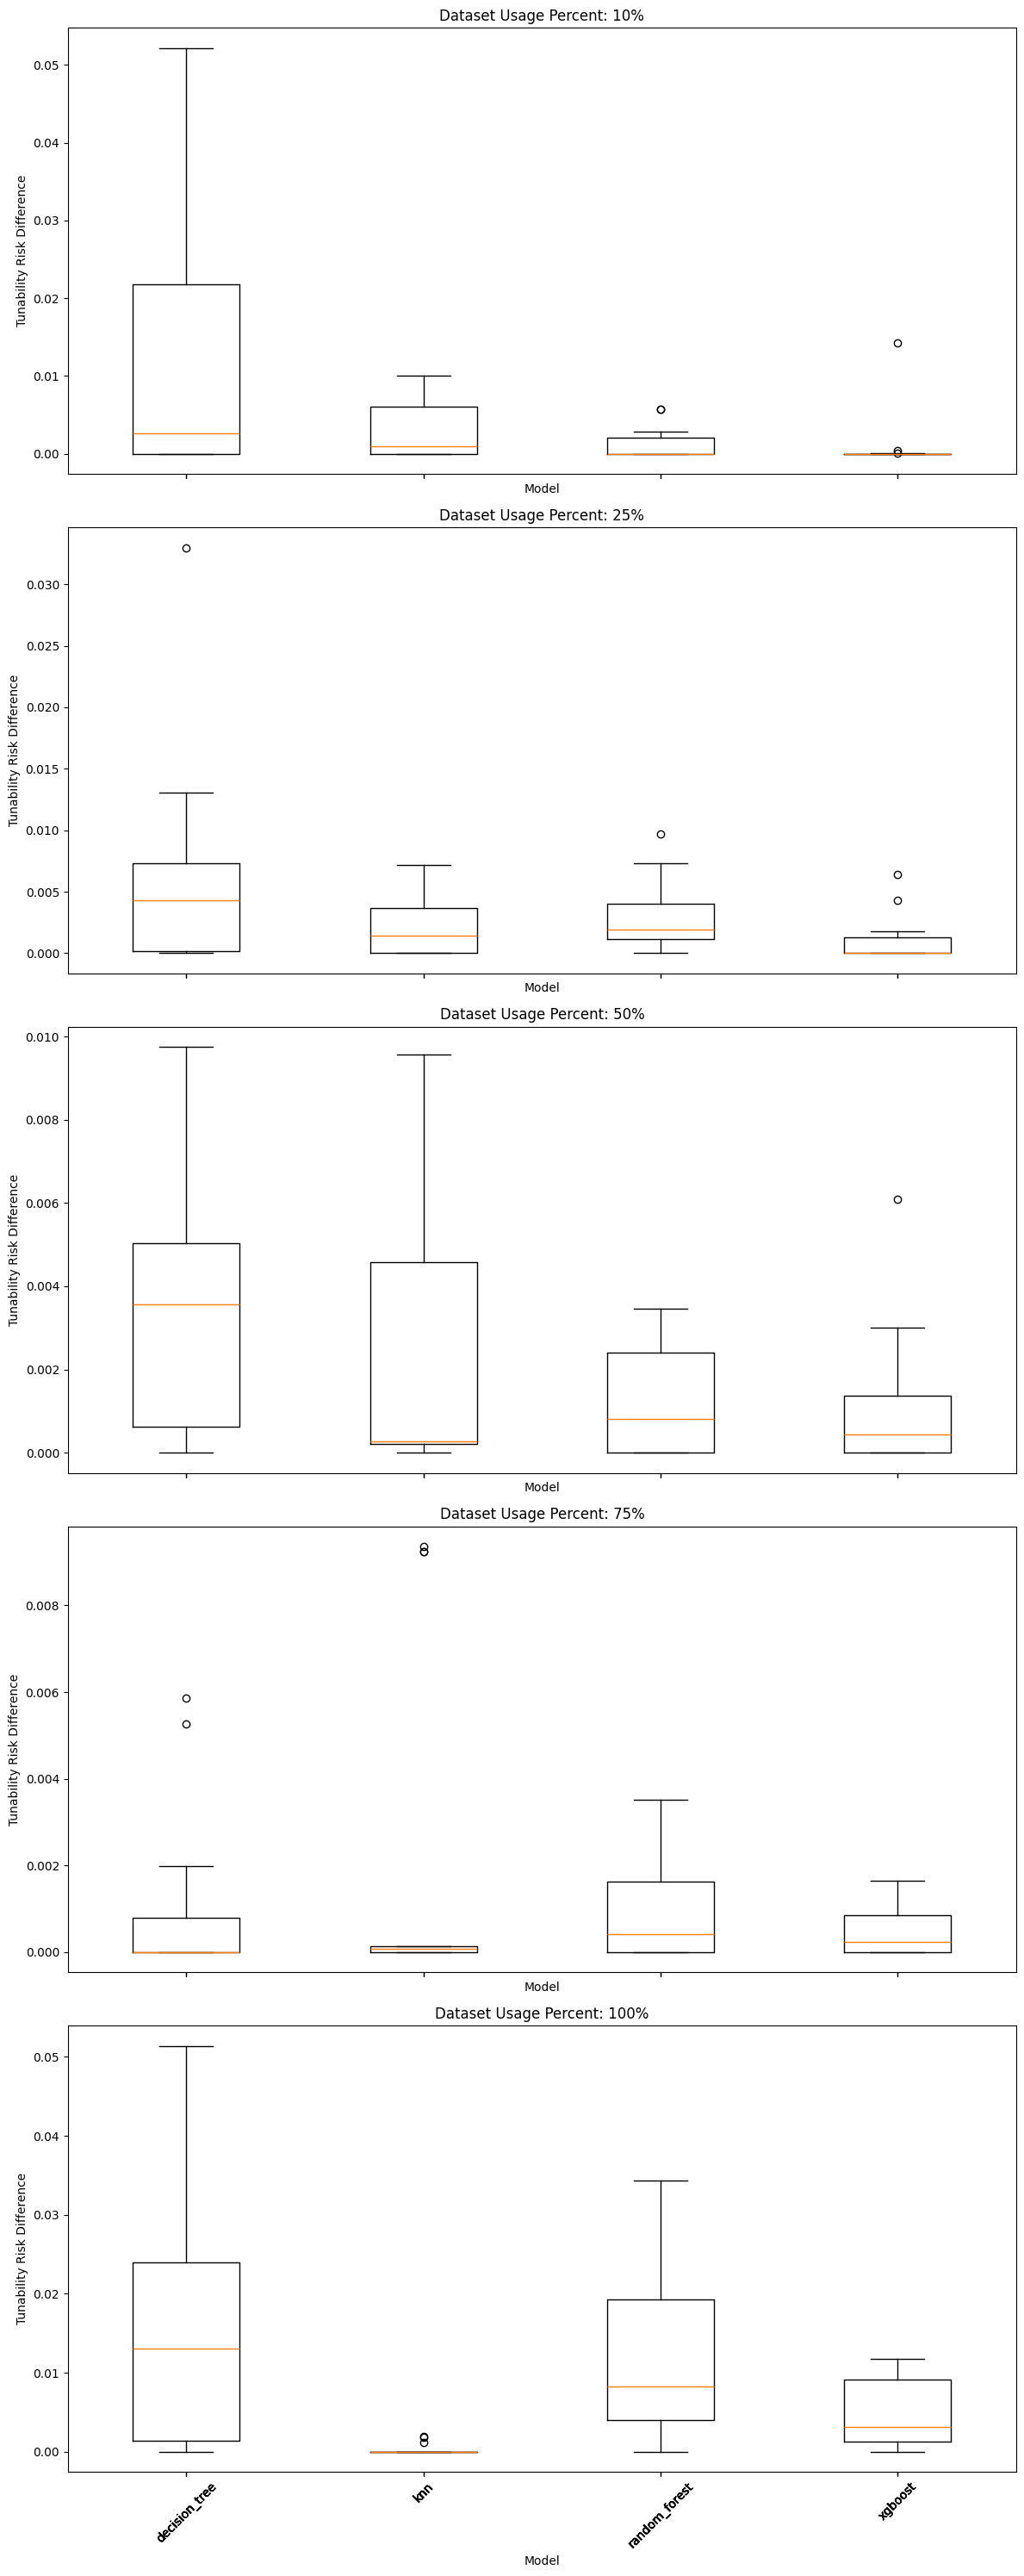

In [59]:
# Analysis per dataset usage percent: Grouped boxplots
usage_percents = sorted(df['dataset_usage_percent'].unique())
fig, axes = plt.subplots(len(usage_percents), 1, figsize=(12, 6 * len(usage_percents)), sharex=True)

for i, usage in enumerate(usage_percents):
    ax = axes[i] if len(usage_percents) > 1 else axes
    subset = df[df['dataset_usage_percent'] == usage]
    models = sorted(subset['model'].unique())
    data_to_plot = [subset[subset['model'] == m]['tunability_risk_diff'].values for m in models]
    if any(len(d) for d in data_to_plot):
        ax.boxplot(data_to_plot, labels=models)
    ax.set_title(f'Dataset Usage Percent: {usage}%')
    ax.set_xlabel('Model')
    ax.set_ylabel('Tunability Risk Difference')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

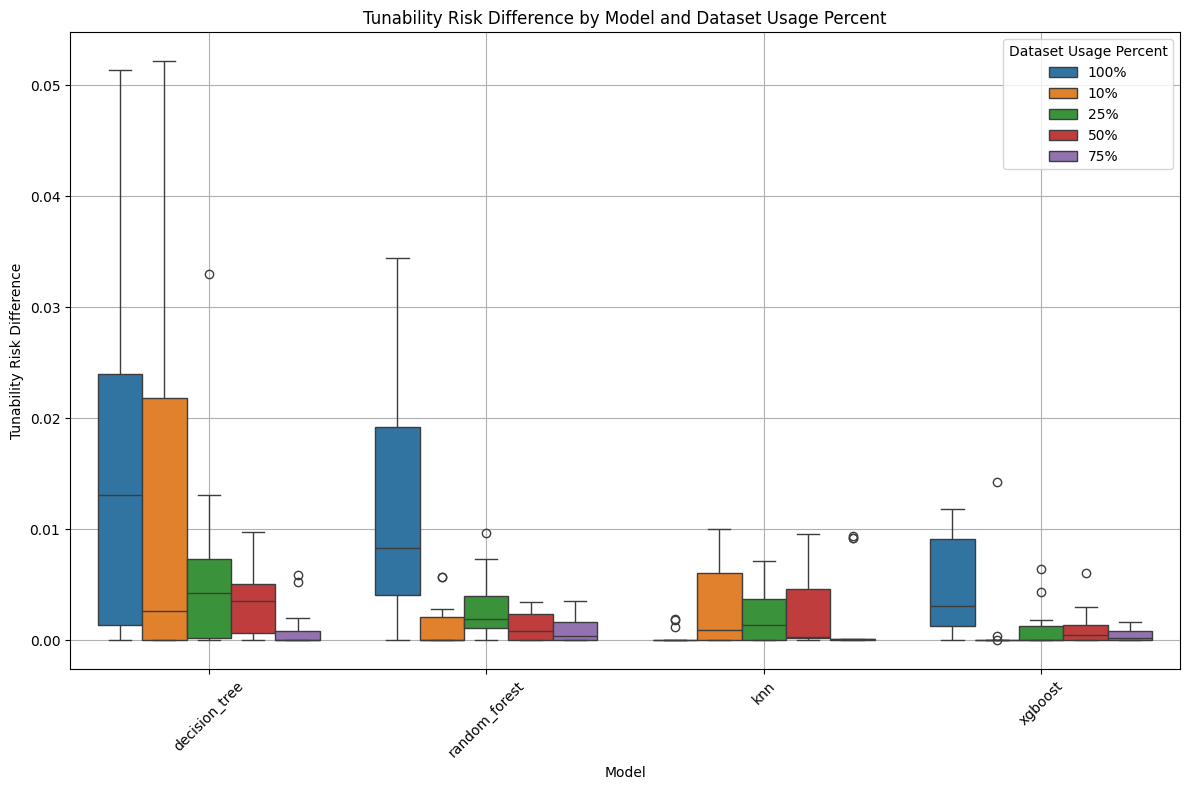

In [ ]:
import seaborn as sns
df = pd.read_csv(DATA_PATH)
df['usage_percent_str'] = df['dataset_usage_percent'].astype(str) + '%'

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(
    data=df,
    x='model',
    y='tunability_risk_diff',
    hue='usage_percent_str',
    ax=ax
)

ax.set_title('Tunability Risk Difference by Model and Dataset Usage Percent')
ax.set_xlabel('Model')
ax.set_ylabel('Tunability Risk Difference')
ax.legend(title='Dataset Usage Percent')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

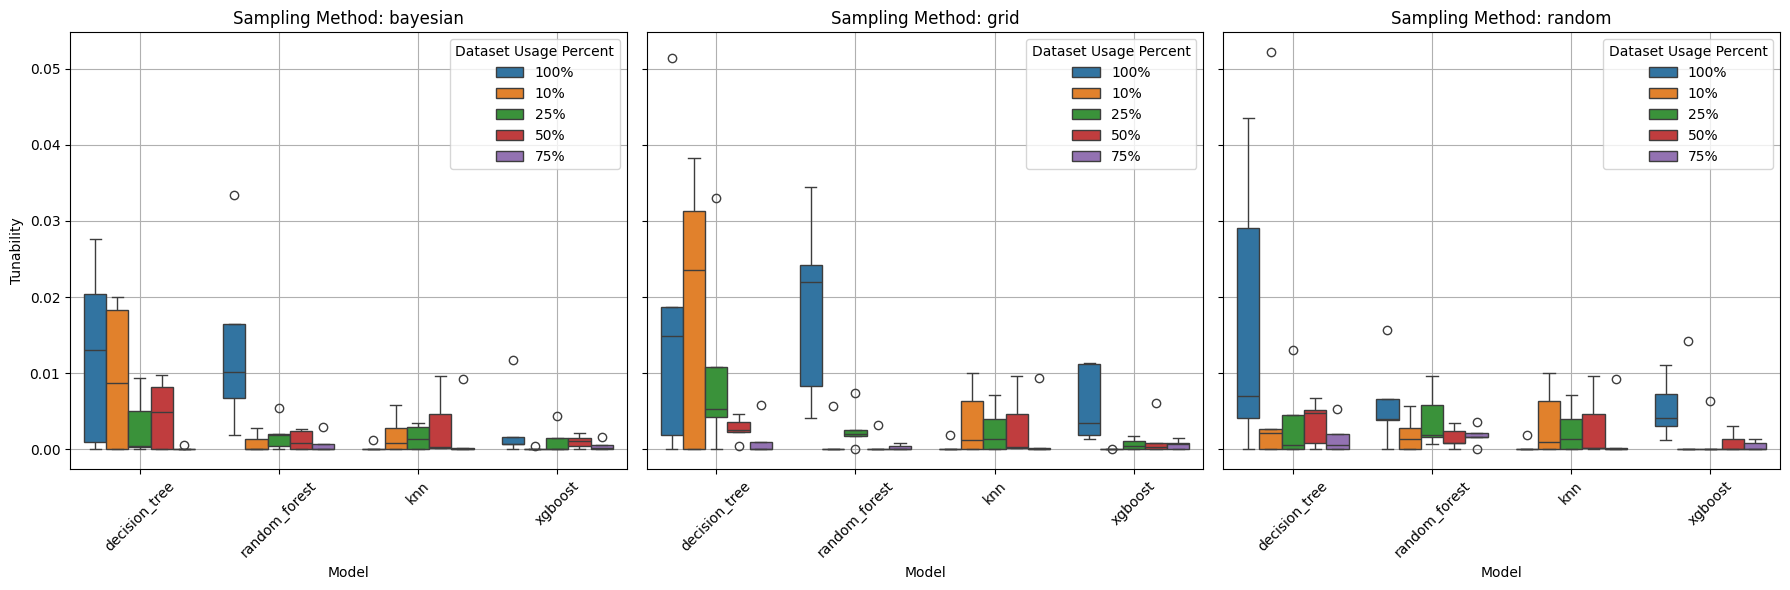

In [ ]:
sampling_methods = sorted(df['sampling_method'].dropna().unique())
cols = 3
fig, axes = plt.subplots(1, cols, figsize=(6 * cols, 6), sharey=True)

for i, method in enumerate(sampling_methods[:cols]): 
    ax = axes[i]
    subset = df[df['sampling_method'] == method]
    sns.boxplot(
        data=subset,
        x='model',
        y='tunability_risk_diff',
        hue='usage_percent_str',
        ax=ax
    )
    ax.set_title(f'Sampling Method: {method}')
    ax.set_xlabel('Model')
    ax.grid(True)
    ax.set_ylabel('Tunability')
    ax.legend(title='Dataset Usage Percent')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

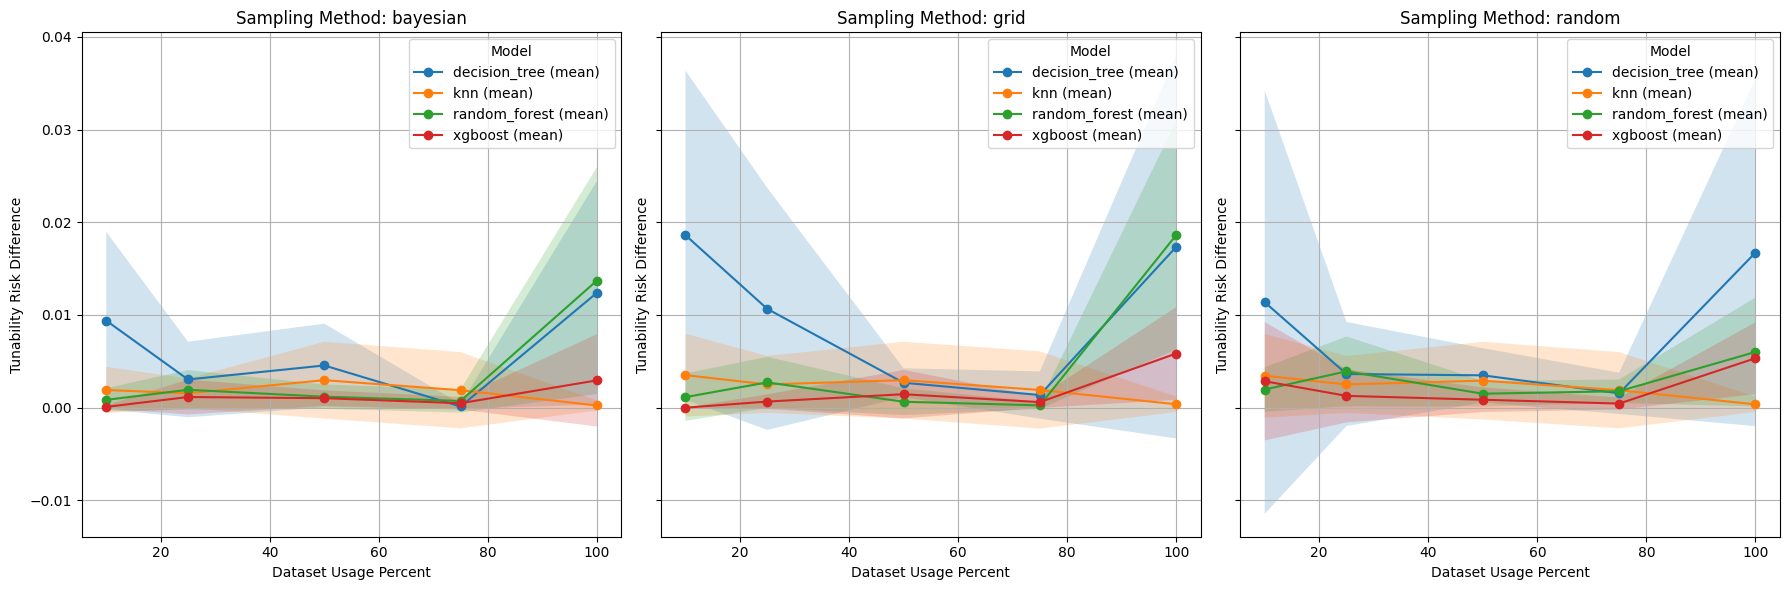

In [ ]:
sampling_methods = sorted(df['sampling_method'].dropna().unique())
cols = 3
fig, axes = plt.subplots(1, cols, figsize=(6 * cols, 6), sharey=True)

for i, method in enumerate(sampling_methods[:cols]):
    subset = df[df['sampling_method'] == method]
    grouped = subset.groupby(['dataset_usage_percent', 'model'])['tunability_risk_diff']
    means = grouped.mean().unstack()
    stds = grouped.std().unstack()

    for model in means.columns:
        ax.plot(means.index, means[model], marker='o', label=f'{model} (mean)')
        ax.fill_between(means.index, means[model] - stds[model], means[model] + stds[model], alpha=0.2)

    ax.set_title(f'Sampling Method: {method}')
    ax.set_xlabel('Dataset Usage Percent')
    ax.set_ylabel('Tunability Risk Difference')
    ax.legend(title='Model')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
results = df.groupby(['sampling_method', 'model', 'dataset_usage_percent'])['tunability_risk_diff'].agg(['mean', 'std']).reset_index()
print('Boxplot Results (Mean and Std):')
print(results)

Boxplot Results (Mean and Std):
   sampling_method          model  dataset_usage_percent      mean       std
0         bayesian  decision_tree                     10  0.009397  0.009578
1         bayesian  decision_tree                     25  0.003047  0.004075
2         bayesian  decision_tree                     50  0.004558  0.004511
3         bayesian  decision_tree                     75  0.000138  0.000264
4         bayesian  decision_tree                    100  0.012401  0.012058
5         bayesian            knn                     10  0.001912  0.002499
6         bayesian            knn                     25  0.001554  0.001599
7         bayesian            knn                     50  0.002973  0.004142
8         bayesian            knn                     75  0.001889  0.004106
9         bayesian            knn                    100  0.000242  0.000542
10        bayesian  random_forest                     10  0.000848  0.001254
11        bayesian  random_forest           